# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
import tensorflow as tf
from datetime import datetime
import matplotlib.pyplot as plt


# Data Pre-Processing

In [2]:
coffee_data = pd.read_excel('coffee_data.xlsx')
fuel_data = pd.read_excel('fuel_data.xlsx')
#tomato_data = pd.read_excel('tomato_data.xls')

### Filter Coffee data

In [3]:
coffee_data['Ngày'] = pd.to_datetime(coffee_data['Ngày'])
coffee_data['Giá Cà Phê'] =  coffee_data['Giá']
coffee_data.drop(coffee_data.columns[[0, 1, 2, 3, 5]], axis=1, inplace=True)
coffee_data.head(5)

,Ngày,Giá Cà Phê
0,2021-01-01,31667.5
1,2021-01-04,32717.0
2,2021-01-05,32417.0
3,2021-01-06,32317.0
4,2021-01-07,32117.0


### Filter Tomato data

In [4]:
# tomato_data['Ngày'] = pd.to_datetime(tomato_data['Ngày tháng'])
# tomato_data.drop(tomato_data.columns[[0, 1, 2, 3, 5]], axis=1, inplace=True)
# tomato_data.head(5)

### Filter Diesel data

In [5]:
fuel_data["Ngày"] = pd.to_datetime(fuel_data["Giá nhiên liệu"], format="%d.%m.%Y")
fuel_data.drop(fuel_data.columns[[0,1,2,4]], axis='columns', inplace=True)
# reverse the order
fuel_data = fuel_data[::-1]
fuel_data.head(5)

,Dầu Diesel 1 lít,Ngày
118,14.90,2019-01-01
117,14.90,2019-01-16
116,14.90,2019-01-31
115,14.90,2019-02-15
114,15.86,2019-03-02


# SVM model

In [6]:
coffee_data.head(5)

,Ngày,Giá Cà Phê
0,2021-01-01,31667.5
1,2021-01-04,32717.0
2,2021-01-05,32417.0
3,2021-01-06,32317.0
4,2021-01-07,32117.0


In [7]:
# drop date column
coffee_data.drop(coffee_data.columns[[0]], axis=1, inplace=True)
coffee_data.dropna()

,Giá Cà Phê
0,31667.5
1,32717.0
2,32417.0
3,32317.0
4,32117.0
...,...
619,55566.5
620,56066.5
621,56666.5
622,57000.0


In [8]:
# Function to create lagged features and targets
def create_lagged_data(data, lag=1):
    X, y = [], []
    for i in range(len(data) - lag):
        X.append(data[i:i + lag])
        y.append(data[i + lag])
    return np.array(X), np.array(y)

# Create lagged features and targets with a lag of 1 (use previous price to predict the next one)
lag = 1
X, y = create_lagged_data(coffee_data['Giá Cà Phê'], lag)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Define the parameter grid to search over
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 1]
}

In [ ]:
svm_regressor = SVR()

In [12]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']})

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [13]:
# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [14]:
# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

print("Best parameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Squared Error: 215424.05034692172
R-squared: 0.9926643118534791


Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Squared Error: 215424.05034692172
R-squared: 0.9926643118534791

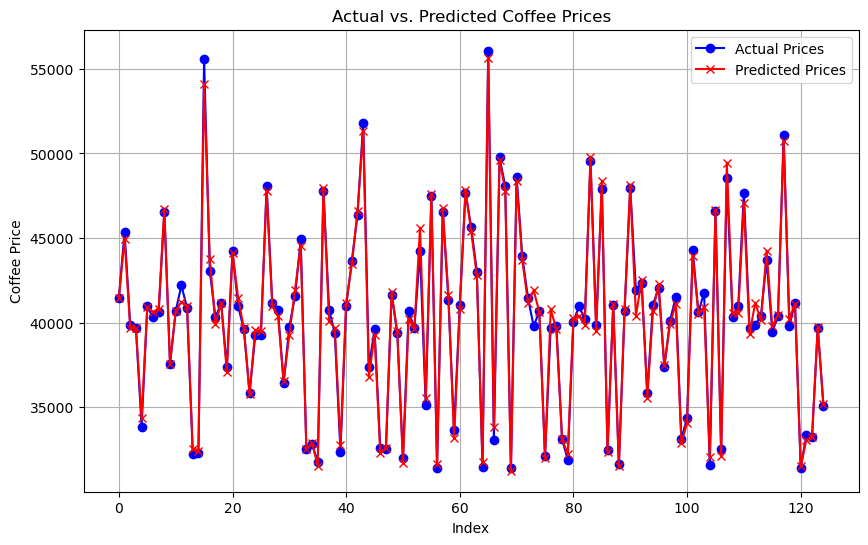

In [15]:
# Plot the actual coffee prices (ground truth)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices', color='blue', marker='o')

# Plot the predicted coffee prices
plt.plot(y_pred, label='Predicted Prices', color='red', marker='x')

plt.xlabel('Index')
plt.ylabel('Coffee Price')
plt.title('Actual vs. Predicted Coffee Prices')
plt.legend()
plt.grid(True)
plt.show()

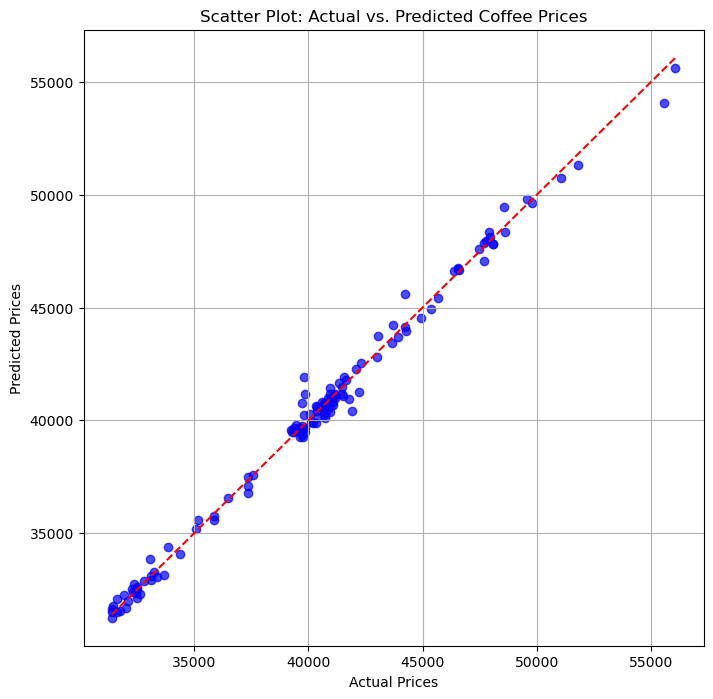

In [16]:
# Create a scatter plot for actual vs. predicted prices
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Scatter Plot: Actual vs. Predicted Coffee Prices')
plt.grid(True)
plt.show()